# Analysis of Museum Social Media
This Notebook studies the tweet content, likes, and retweets of 15 US art museums. During this period of social distancing and quarantine, museums must now diversify their online presence, become more socially conscious, and actively involve a greater audience. This notebook visualizes current social media strategies of art museums and intends to provide insights on how museums can effectively use their platforms. 

## Questions: 
* What are the common topics that  museums are currently highlighting on their social media?
* What are the themes of museum tweets which gain the most interaction and attention? 
* Are museums interacting with current events? (Black Lives Matter? LGBTQ Pride Month?) 

## Methods featured in this notebook:
* Tweepy: Access and gather tweet content, date, number of likes, retweets 
* Pandas: Manipulate Twitter data into dataframe
* Natural Language Tool Kit: Clean texts (remove stopwords, punctuation)
* WordCloud: Create word clouds of most used words from Tweets
* Matplotlib: Visualize word frequency and retweets, likes through bar graphs



In [1]:
import tweepy #twitter API
import pandas as pd #convert tweet data into dataframe
import matplotlib.pyplot as plt #generate into visualizations
import numpy as np #arrays
from glob import glob #get files in directory

import nltk #preprocess tweet text
# nltk.download("stopwords") 
# nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords #removes stopwords
from collections import Counter #count word frequency
from string import punctuation #punctuation to be removed
edited_punctuation = punctuation + "…“”’©" #edited punctuation includes specific punctuation used in Tweets
import sys
import re

#!python -m spacy download en_core_web_sm 
#!python -m spacy download en_core_web_lg
import spacy #lemmatization
spacy.load('en_core_web_lg')

from wordcloud import WordCloud #make wordclouds

In [2]:
cd /Users/chloeakazawa/Desktop/DH\ Project

/Users/chloeakazawa/Desktop/DH Project


# Tweepy: 
This activates Twitter API:

In [3]:
# Tweepy: Authorize twitter developer account
consumer_key = "nyFuYkFTnDnBjwD4Xtk9WTFBg"
consumer_secret =  "hftaqgXkEXgfbdlSXGPx7TCowxIeJsa82Ne5uBw69Kff2zWSkO"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Provide account tokens
access_key = "1267319996218175489-DIGJ258MNb01yh3tfi2qwxHdsA2kHu"
access_secret =  "F2oD2aEdnIXoG2zDz0IqW35sKioCOYqXhfzseQRe9tfRp"
auth.set_access_token(access_key, access_secret)
# Define an API instance
api = tweepy.API(auth)
#Credit to Evan Muzzall, DIGHUM 101 Week 3, Notebook 3.2

This function collects tweet data, arranges into a dataframe, and saves as csv file:
* Collects 200 tweets per account
* Accesses date, username, number of likes, retweets, followers per tweet collected

In [43]:
def get_tweets_df(user_name, save_name=None, num_tweets=200):      
    # list of Tweet objects, each Tweet has retweet_count, likes_count, etc.
    tweets_found = api.user_timeline(screen_name=user_name, count=num_tweets, tweet_mode='extended', include_rts=False)
    
    retweet_data = [tweet.retweet_count for tweet in tweets_found] # column of number of retweets
    favorite_data = [tweet.favorite_count for tweet in tweets_found] #column of number of likes
    tweet_data = [tweet.full_text for tweet in tweets_found] # column of tweet texts
    date_data = [tweet.created_at for tweet in tweets_found] #column of dates
    
    # repeat list for however many tweets there are
    user = api.get_user(user_name)
    followers_data = [user.followers_count for i in range(len(tweets_found))] #column of followers 
    museum_name = [user_name for i in range(len(tweets_found))] #column of museum user name 

    #dataframe structure
    twitter_df = pd.DataFrame({"Username": user_name, "Tweet" : tweet_data, "Date" : date_data, "Number of Retweets" : retweet_data, 
                               "Number of Likes" : favorite_data, "Number of Followers" : followers_data}) 
    #function to not overwrite csv every time this code runs
    if save_name is not None:
        twitter_df.to_csv(save_name)
    
    return twitter_df 

My Dataset: 15 Art Museums Twitter Accounts
1. "TheBroad" = The Broad Museum, CA
2. "WomenInTheArts" = National Museum of Women in the Arts, DC
3. "metmuseum" = The Metropolitan Museum of Art, NY
4. "ClevelandArt" = The Cleveland Museum of Art, OH
5. "mfaboston" = Boston Museum of Fine Arts, MA
6. "DIADetroit" = Detroit Institute of Arts, MI
7. "GettyMuseum" = Getty Museum, CA
8. "ngadc"= National Gallery of Art, DC
9. "artinstitutechi" = Art Institute of Chicago, IL
10. "philamuseum"= Philadelphia Museum of Art, PA
11. "deyoungmuseum" = DeYoung Museum, CA
12. "oaklandmuseumca" = Oakland Museum, CA
13. "MuseumModernArt"= MOMA, NY
14. "frickcollection"= Frick Collection, NY
15. "smithsonian"= Smithsonian Institution, DC

In [3]:
#Dataset: 15 museum accounts, 200 tweets each, saved as csv 
museum_usernames = ["TheBroad", "WomenInTheArts", "metmuseum", "ClevelandArt", 
                    "mfaboston", "DIADetroit", "GettyMuseum", "ngadc", 
                    "artinstitutechi","philamuseum","deyoungmuseum","oaklandmuseumca",
                    "MuseumModernArt","frickcollection","smithsonian"]
save_names = ['broad.csv','nmwa.csv', 'met.csv', 'cleveland.csv', 'boston.csv',
              'detroit.csv','getty.csv','nga.csv','institute.csv', 'phila.csv',
              'deyoung.csv','oakland.csv','MOMAtweets.csv','frick.csv','smith.csv']

In [ ]:
#Compiled list of all museum tweet data
museum_df_list = []
for username, save_name in zip(museum_usernames, save_names):
    museum_df = get_tweets_df(username, save_name)
    museum_df_list.append(museum_df)

In [7]:
#Code to run when I had already extracted tweets as to not rewrite my data
museum_df_list = []
for save_name in save_names:
    museum_df = pd.read_csv(save_name, index_col = "Unnamed: 0")
    museum_df_list.append(museum_df)

In [8]:
#all museums in one dataframe
museum_df = pd.concat(museum_df_list)
museum_df

,Username,Tweet,Date,Number of Retweets,Number of Likes,Number of Followers
0,TheBroad,"Through live installations, brand development,...",2020-06-25 01:00:45,0,0,36392
1,TheBroad,Trap Heals is a collective of artists and stra...,2020-06-25 01:00:45,0,0,36392
2,TheBroad,"In this first video of a series by Trap Heals,...",2020-06-25 01:00:44,0,3,36392
3,TheBroad,"For #PrideMonth, we’re celebrating the role of...",2020-06-24 18:03:03,0,3,36392
4,TheBroad,.@OsopePatrisse: Art is how we get to the plac...,2020-06-23 20:30:06,1,7,36392
...,...,...,...,...,...,...
165,smithsonian,"For something sunny and cozy, we're sending th...",2020-04-21 15:05:00,61,246,2633475
166,smithsonian,@danasdu @EllenStofan @SmithsonianACM Good new...,2020-04-21 14:39:43,0,1,2633475
167,smithsonian,"@Artemis__Fox Hi, usually we'd recommend worki...",2020-04-20 19:09:40,0,4,2633475
168,smithsonian,"In this very digital moment, we're spending a ...",2020-04-20 17:09:00,65,195,2633475


In [8]:
# get df for one museum by finding rows that match museum username
def matching_username_rows(df, user_name):
    return df[df['Username'] == user_name]

# Text Analysis: 
Functions to preprocess all tweet texts through NLTK. Removal of URLs, Emojis, Stopwords, Punctuation:

In [1]:
#imports tweet text, removes URL links, coverts to lowercase, removes punctuation, and removes emojis
def preprocess(df_name):

    dataframeimport = df_name["Tweet"].str.cat(sep = ' ') # Googled "pandas series of strings into one string"
    
    # short for regex, short for regular expressions, string pattern-matching operations
    dataframeimport = re.sub(r"http\S+", "", dataframeimport).lower()

    for char in edited_punctuation:
        dataframeimport = dataframeimport.replace (char, "")
        dataframeimport = dataframeimport.replace ("—", " ") #specific dash I had to manually remove
        dataframeimport = dataframeimport.replace ("&amp", " and ")
    regrex_pattern = re.compile(pattern = "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', dataframeimport)  
#credit to https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
#credit to https://gist.github.com/MrEliptik/b3f16179aa2f530781ef8ca9a16499af?fbclid=IwAR0Ci1f2SB7cX2q8yB8JGNtsnwbqFryu6TEkI0mqqzqV1zscxsNMbdVmBas#file-text_preprocessing-py-L29

In [10]:
#remove stopwords 
def remove_stopwords(text_name):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in text_name:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [11]:
# Load the small pretrained model
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])

In [12]:
# Define our function
def lemmatize(tokens):
    """Return the lemmas for each word in `tokens`."""
    # spacy models operate on strings not lists, so we turn the tokens back into
    # a string of words
    words = ' '.join(tokens)
    # this line does all sorts of processing, including the lemmatization.
    # `doc` will be like a list of tokens that we can iterate over
    doc = nlp(words)
    # each token in `doc` holds information about that token. The `lemma_`
    # attribute holds the lemma of that token represented as a string. For
    # performance reasons, the `lemma` (without the trailing underscore) holds
    # an integer representation of the token, that we'll rarely ever need.

    lemmatized_words = [token.lemma_ if token.lemma_ !='-PRON-' else token.text for token in doc]
    return lemmatized_words
# credit to https://stackoverflow.com/questions/59077577/cannot-replace-spacy-lemmatized-pronouns-pron-through-text

# Analysis of All Tweet Content:
This study collects all tweet content from museum_df (dataframe of all museum accounts and tweet data) and visualizes the most common words of museum tweets.

## Tools and Methods featured:
* Text Processing 
* Word Cloud 
* Bar Graph of Top 20 Words

Text processing using preprocess, remove_stopwords, lemmatize functions:

In [13]:
processed_text = preprocess(museum_df).split()
no_stopwords = remove_stopwords(processed_text)
text_lemmatized = lemmatize(no_stopwords)

In [14]:
# get number of elements in list = total number of words in dataset
len(text_lemmatized)

47433

In [24]:
freq = Counter(text_lemmatized) #generate words and their count
themes = freq.most_common(20)
print(themes)

[('art', 490), ('artist', 419), ('work', 361), ('us', 271), ('museum', 235), ('collection', 228), ('new', 207), ('learn', 185), ('like', 177), ('make', 176), ('see', 175), ('explore', 174), ('today', 171), ('one', 169), ('time', 161), ('painting', 159), ('share', 159), ('thank', 157), ('look', 148), ('day', 146)]


## Word Cloud #1:
Generates word cloud of all museum tweet content:

(-0.5, 399.5, 349.5, -0.5)

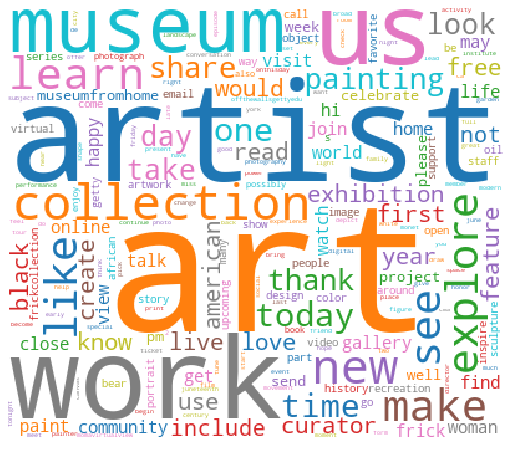

In [19]:
#generate word cloud
wc = WordCloud(width=400, height=350, background_color='white', 
           colormap='tab10')
wc.generate_from_frequencies(freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
#credit to https://www.datacamp.com/community/tutorials/wordcloud-python
#color credit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [85]:
#save as png
wc.to_file('museum_wordcloud.png')

## Bar Graph #1
Bar Graph representation of Word Cloud. Plots top 20 most frequent words in museum tweets:

In [25]:
barplot_df = pd.DataFrame(themes, columns = ["Word", "Frequency"])
#generate barplot dataframe of words and frequency
barplot_df

,Word,Frequency
0,art,490
1,artist,419
2,work,361
3,us,271
4,museum,235
5,collection,228
6,new,207
7,learn,185
8,like,177
9,make,176


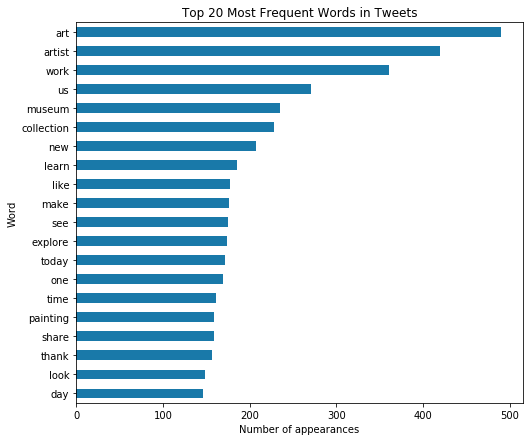

In [26]:
barplot_ax = barplot_df.plot.barh(x = "Word", y = "Frequency", figsize = (8,7), 
                                  color = "#1979a9", legend=None)
barplot_ax.set(title="Top 20 Most Frequent Words in Tweets", xlabel="Number of appearances")
barplot_ax.invert_yaxis()
fig_barplot = barplot_ax.get_figure() # get figure associated with ax object
#credit https://stackoverflow.com/questions/28022227/sorted-bar-charts-with-pandas-matplotlib-or-seaborn
#hex color credit to https://imagecolorpicker.com/en/

In [91]:
#save as png
fig_barplot.savefig("Wordbarplot.png", dpi=150)

## Reflections on Word Cloud & Bar Graph:

#### Original Predictions: 
* The majority of tweets promoted by museums will revolve around links and online resources about the themes of "art" "highlights" "collections" "video" and "virtual" 

#### Results: 
* As predicted, the popular words revolve around museums and art. Many museums are posting daily highlights of their collections or of specific artists
* The most used pronoun is 'us' as museums highlight community and unity 

# Analysis of Most Popular Tweet Content:
This process investigates the most popular tweets per museum account (based on highest number of likes and retweets) and generates a new word cloud and bar graph of frequent words from popular tweets

## Tools and Methods featured:
* Sorting/Re-Ordering of dataframes to present only Top 5 Tweets per Museum
* Text Processing
* Word Cloud of Frequent Words
* Bar Graph of Top 20 Words


In [93]:
#Re-ordering dataframes to show highest tweet interaction per dataframe
def sortdata (name_df): 
    name_df.sort_values (by = ['Number of Likes', 'Number of Retweets'], inplace = True, ascending=False)
#credit to https://datatofish.com/sort-pandas-dataframe/

In [112]:
top5_tweets_list = [] #holds all the top 5 tweets from each museum

for museum in museum_usernames:
    #get rows of museum_df where Username == museum
    df_of_matching_names = matching_username_rows(museum_df, museum)
    sortdata(df_of_matching_names) # sort by number of likes/retweets
    top5 = df_of_matching_names.head(5) # get the top 5 tweets in sorted df_of_matching_names
    
    top5_tweets_list.append(top5)
    
top5 = pd.concat(top5_tweets_list)

/Users/chloeakazawa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Dataframe of Top 5 Tweets per museum Twitter account:

In [116]:
top5

,Username,Tweet,Date,Number of Retweets,Number of Likes,Number of Followers
124,TheBroad,We’re livestreaming #YayoiKusama’s Infinity Mi...,2020-03-14 16:10:09,253,611,36392
103,TheBroad,"We've donated 158 boxes of nitrile gloves, 90 ...",2020-03-24 19:31:15,52,242,36392
101,TheBroad,Experience an immersive environment of light a...,2020-03-26 16:01:00,136,166,36392
102,TheBroad,"To: @LACMA, @MOCAlosangeles, @hammer_museum, @...",2020-03-24 21:51:02,19,116,36392
106,TheBroad,"In 1966, Yayoi Kusama was 37 years old, and sh...",2020-03-22 16:00:16,23,79,36392
...,...,...,...,...,...,...
12,smithsonian,#Juneteenth marks the day enslaved African Ame...,2020-06-19 12:42:11,1137,1811,2633475
14,smithsonian,"""Until the killing of black men, black mothers...",2020-06-17 16:30:11,289,701,2633475
108,smithsonian,Have you spotted our new cheetah cubs at @Nati...,2020-05-11 16:57:15,145,652,2633475
158,smithsonian,Today is #EarthDay. At this difficult and unpr...,2020-04-22 13:52:32,276,593,2633475


## Tableau Visualization: 
Since Tableau is an outside application, I do not have code here constructing my Tableau map. However, here I save my top tweets csv which I can drag and drop into the app: 

In [118]:
#Save as csv to be exported to Tableau
top5.to_csv ("toptweets.csv")

In [122]:
#Process text of top 5 tweets per museum (eliminate URLs, emojis, stopwords, punctuation)
processed_text = preprocess(top5).split()
no_stopwords = remove_stopwords(processed_text)
text_lemmatized = lemmatize(no_stopwords)

#### Here is the Link to the Interactive Map online: 
https://public.tableau.com/profile/chloe5867#!/vizhome/toptweets/Sheet1
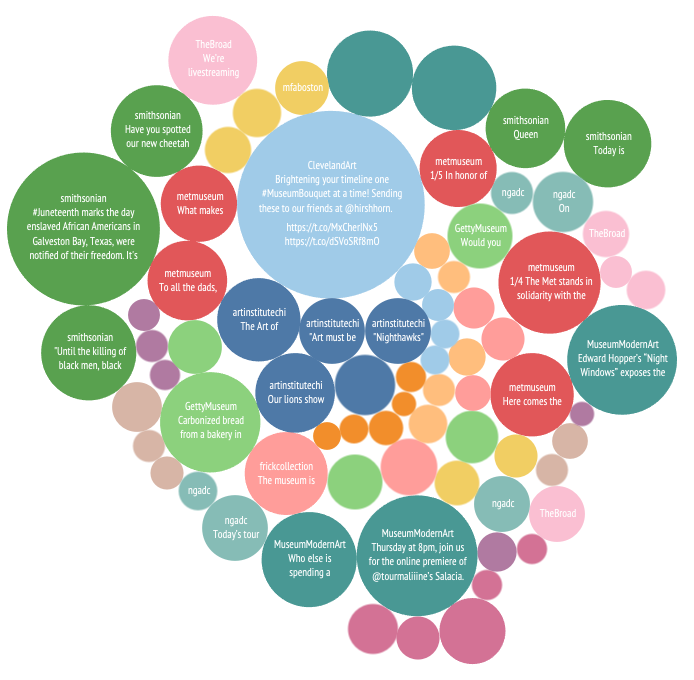

In [129]:
freq = Counter(text_lemmatized) #generate words and their count
themes = freq.most_common(20)
print(themes)

[('today', 15), ('artist', 13), ('black', 11), ('time', 11), ('day', 10), ('work', 10), ('museum', 10), ('art', 9), ('us', 9), ('one', 9), ('painting', 9), ('museumfromhome', 9), ('see', 8), ('staff', 8), ('take', 8), ('monet', 8), ('gallery', 8), ('happy', 7), ('offer', 6), ('bear', 6)]


## Word Cloud #2:
New word cloud of frequent words from top tweets:

(-0.5, 399.5, 349.5, -0.5)

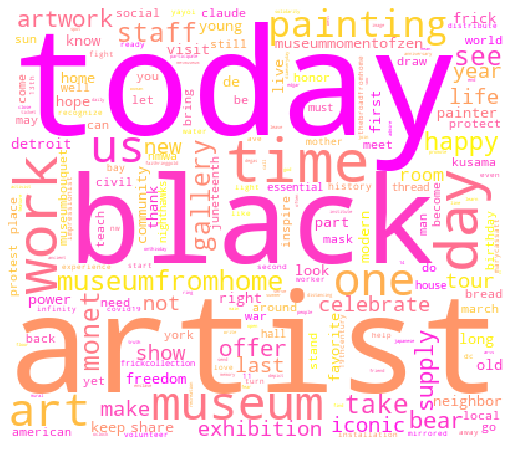

In [127]:
#generate word cloud
wc = WordCloud(width=400, height=350, background_color='white', 
           colormap='spring')
wc.generate_from_frequencies(freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
#credit to https://www.datacamp.com/community/tutorials/wordcloud-python
#color credit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [128]:
#save!
wc.to_file('toptweets_wordcloud.png')

## Bar Graph #2:
Bar graph of Top 20 words of popular tweets:

In [130]:
barplot_df = pd.DataFrame(themes, columns = ["Word", "Frequency"])
#generate barplot dataframe of words and frequency
barplot_df 

,Word,Frequency
0,today,15
1,artist,13
2,black,11
3,time,11
4,day,10
5,work,10
6,museum,10
7,art,9
8,us,9
9,one,9


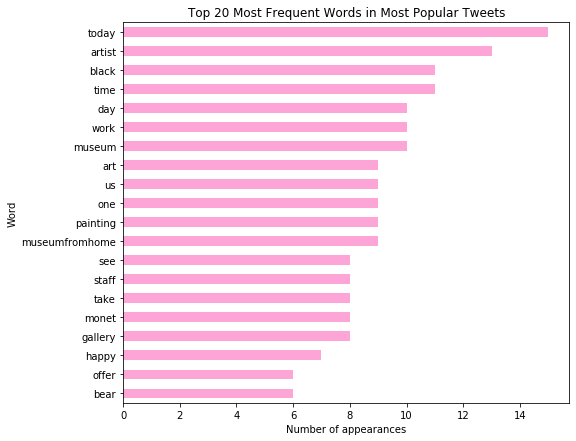

In [135]:
barplot_ax = barplot_df.plot.barh(x = "Word", y = "Frequency", figsize = (8,7), 
                                  color = "#fca5d6", legend=None)
barplot_ax.set(title= "Top 20 Most Frequent Words in Most Popular Tweets", xlabel="Number of appearances")
barplot_ax.invert_yaxis()
fig_barplot = barplot_ax.get_figure() # get figure associated with ax object
# credit https://stackoverflow.com/questions/28022227/sorted-bar-charts-with-pandas-matplotlib-or-seaborn
#hex color credit to https://imagecolorpicker.com/en/

In [138]:
fig_barplot.savefig("Topwordsbarplot.png", bbox_inches='tight', dpi=300)

## Reflections on Word Cloud & Bar Graph: 

#### Original Predictions: 
* I expect museums to be vocal on current events such as the Black Lives Matter movement and Pride month, perhaps showcasing black and queer artists 
* The most popular museum tweets include hashtags that promote user response and interaction

#### Results:
* One striking word is 'black,' which does not appear as a frequent word in the bar graph of total tweets
* Reviewing the most popular tweets, ~11 tweets from various museums across the country are about either Black Lives Matter, protests, black artists, black community,  and black power. 
* 'Black' is the 3rd most frequent word in these popular tweets, revealing that audiences are responsive and supportive of museum engagement with current events
* A frequent word in this bar graph is the phrase #museumfromhome which is a common hashtag museums are using to promote virtual tours while they are closed. The high frequency of this hashtag in popular tweets reveals that hashtags like these are effective in attracting more users and at categorizing museum content across institutions


# Analysis of User Engagement with Top Tweets
This process studies user engagement per museum account, creating a bar graph of percent of user engagement per top tweet. 

## Tools and Methods featured:
* Minimize data to only #1 top tweet per museum
* Calculate Like ratio, Retweet ratio
* Bar Graph of Likes, Retweets of most popular tweet per museum username 

In [6]:
top5 = pd.read_csv ("toptweets.csv", index_col = "Unnamed: 0")

In [9]:
top_tweet_list = [] # holds all the top tweets from each museum

for museum in museum_usernames:
    # get rows of museum_df where Username == museum
    df_of_matching_names = matching_username_rows(top5, museum)
    top = df_of_matching_names.head(1) # get the top 5 tweets in sorted df_of_matching_names
    
    top_tweet_list.append(top)
    
top = pd.concat(top_tweet_list)

Dataframe of only top 1 museum tweets for each museum account:

In [12]:
#Dataframe of only #1 tweets per museum
top

,Username,Tweet,Date,Number of Retweets,Number of Likes,Number of Followers
124,TheBroad,We’re livestreaming #YayoiKusama’s Infinity Mi...,2020-03-14 16:10:09,253,611,36392
47,WomenInTheArts,"Masks on, supplies out, staff ready. 💪 If you'...",2020-06-06 17:15:38,102,338,57593
69,metmuseum,1/4 The Met stands in solidarity with the Blac...,2020-05-31 20:46:37,260,809,4341580
72,ClevelandArt,Brightening your timeline one #MuseumBouquet a...,2020-03-24 15:01:02,512,2729,52814
135,mfaboston,"The MFA might be closed, but we’re still bring...",2020-04-27 20:29:05,44,224,403004
30,DIADetroit,Fascinate today. #DIAeveryday https://t.co/NVz...,2020-06-14 17:15:05,22,117,176015
30,GettyMuseum,Carbonized bread from a bakery in Pompeii on t...,2020-06-13 22:54:30,236,780,1347456
139,ngadc,Today’s tour features works by some of Impress...,2020-05-27 19:21:39,106,335,259438
65,artinstitutechi,The Art of Quarantine enlists some of the Art ...,2020-04-01 17:28:46,272,545,364708
152,philamuseum,Let's visit one of our favorite period rooms. ...,2020-04-18 13:01:12,59,192,267747


In [16]:
#Calculate engagement ratios
top ["Likes Ratio"] = top ["Number of Likes"] / top["Number of Followers"] * 100
top ["Retweets Ratio"] = top["Number of Retweets"] / top["Number of Followers"] * 100

Dataframe with columns of calculated Likes and Retweets ratios: 

In [17]:
top

,Username,Tweet,Date,Number of Retweets,Number of Likes,Number of Followers,Likes Ratio,Retweets Ratio
124,TheBroad,We’re livestreaming #YayoiKusama’s Infinity Mi...,2020-03-14 16:10:09,253,611,36392,1.678940,0.695208
47,WomenInTheArts,"Masks on, supplies out, staff ready. 💪 If you'...",2020-06-06 17:15:38,102,338,57593,0.586877,0.177105
69,metmuseum,1/4 The Met stands in solidarity with the Blac...,2020-05-31 20:46:37,260,809,4341580,0.018634,0.005989
72,ClevelandArt,Brightening your timeline one #MuseumBouquet a...,2020-03-24 15:01:02,512,2729,52814,5.167191,0.969440
135,mfaboston,"The MFA might be closed, but we’re still bring...",2020-04-27 20:29:05,44,224,403004,0.055583,0.010918
30,DIADetroit,Fascinate today. #DIAeveryday https://t.co/NVz...,2020-06-14 17:15:05,22,117,176015,0.066472,0.012499
30,GettyMuseum,Carbonized bread from a bakery in Pompeii on t...,2020-06-13 22:54:30,236,780,1347456,0.057887,0.017514
139,ngadc,Today’s tour features works by some of Impress...,2020-05-27 19:21:39,106,335,259438,0.129125,0.040858
65,artinstitutechi,The Art of Quarantine enlists some of the Art ...,2020-04-01 17:28:46,272,545,364708,0.149435,0.074580
152,philamuseum,Let's visit one of our favorite period rooms. ...,2020-04-18 13:01:12,59,192,267747,0.071709,0.022036


In [50]:
top.to_csv ("MostpopularTweets.csv")

# Bar Graph #3:
Graph of Likes and Retweets of #1 Top Museum Tweets per Museum Account, representing user engagement of their audiences:

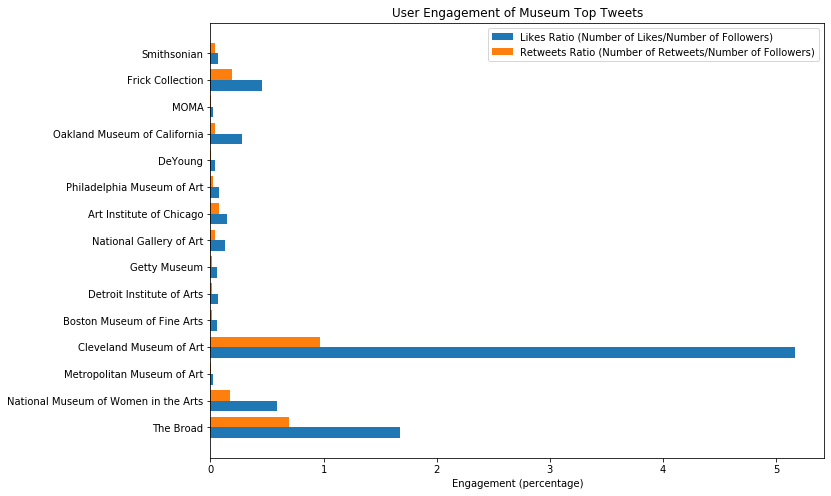

In [49]:
N = 15

# Data on X-axis

# Position of bars on x-axis

ind = np.arange(N)

# Figure size
fig, ax = plt.subplots(figsize=(11,8))

# Width of a bar 
width = 0.4

# Plotting
ax.barh(ind, top["Likes Ratio"] , width, label='Likes Ratio (Number of Likes/Number of Followers)')
ax.barh(ind + width, top["Retweets Ratio"], width, label='Retweets Ratio (Number of Retweets/Number of Followers)')

ax.set(xlabel='Engagement (percentage)', title='User Engagement of Museum Top Tweets')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.yticks(ind + width / 2, ('The Broad', 'National Museum of Women in the Arts', 
                             'Metropolitan Museum of Art', 'Cleveland Museum of Art',
                            'Boston Museum of Fine Arts', 'Detroit Institute of Arts',
                            'Getty Museum','National Gallery of Art','Art Institute of Chicago',
                            'Philadelphia Museum of Art', 'DeYoung','Oakland Museum of California',
                             'MOMA', 'Frick Collection', 'Smithsonian'))

# Finding the best position for legends and putting it
ax.legend(loc='best');

#Thank you Evan for the help!!

In [59]:
#Save as png
fig.savefig("UserEngagement.png", bbox_inches='tight', dpi=300)

## Reflections on User Engagement Bar Graph:

#### Original Predictions:
* I expected that the large institutions would receive the most user engagement since they have the largest followings


#### Results: 
* Overall, the smaller museums had more user engagement than the large institutions, which I did not expect
* The most popular tweet by far was from the Cleveland museum of art, where they posted a painting of flowers from their collection, sending it as a virtual bouquet to the Hirshhorn museum 



### Examples of Popular Tweets featured in Engagement Graph:

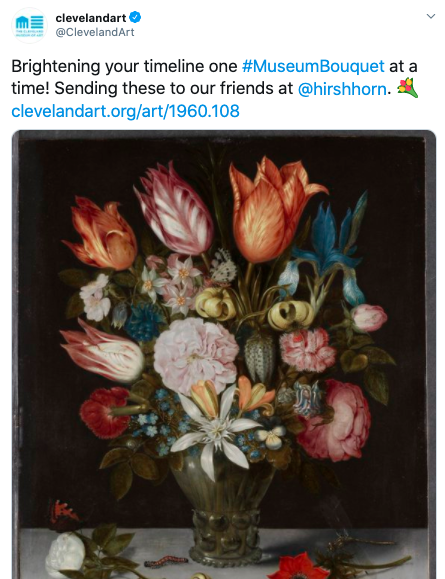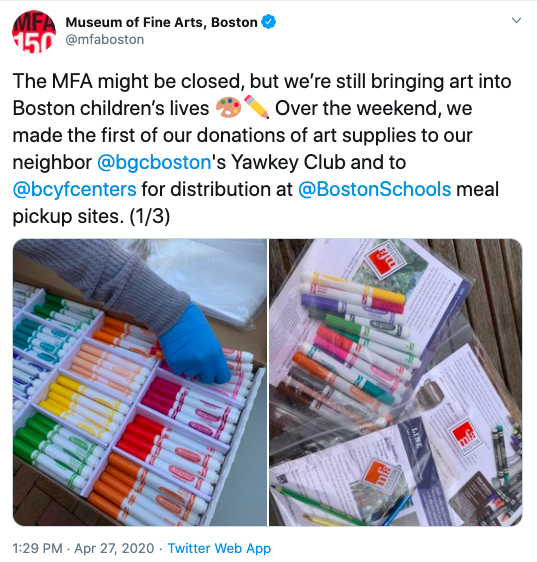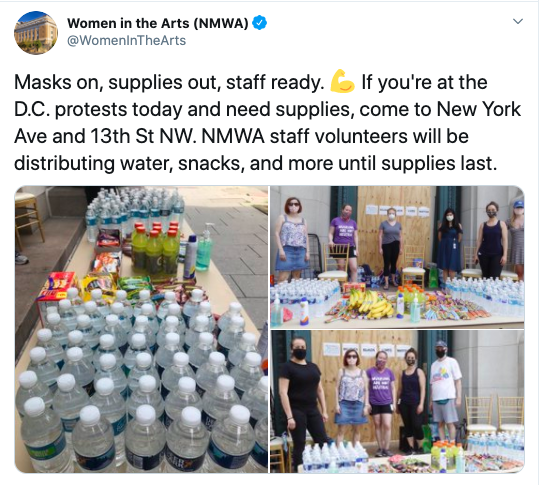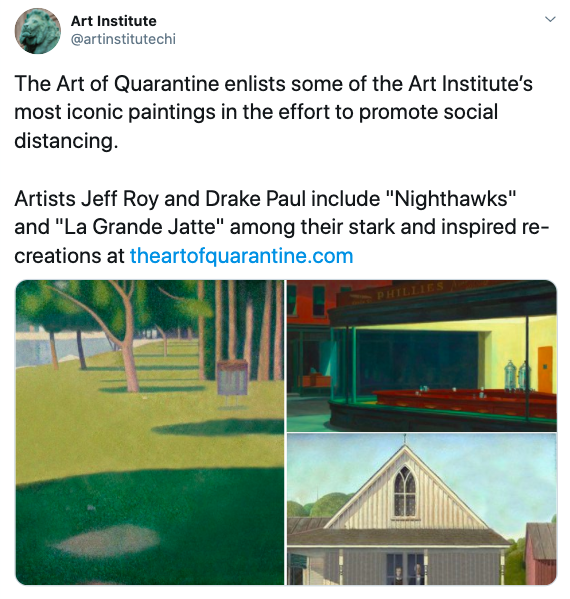

# Final Thoughts: 
   During quarantine, museums are applying art to current social activism, integrating art into community, and transmitting art out of the gallery into everyday life. My results revealed more than what I expected such as the importance of museum engagement in community.  The study of common themes of top tweets and of user engagement were most insightful. The most popular tweets include responses to current events, solidarity with communities, and conversations with other museums. What I found most surprising was that smaller museums like the Cleveland museum of art, National Museum of Women in the Arts, and Oakland Museum experience the most user engagement. These museums interact directly with their surrounding communities, and their popular tweets actively participate in current events (local protests, organizations, etc.) in contrast to large institutions who post more general content. 
   
  The results of this study offer helpful ways museums can diversify their content and broaden their online outreach and accessibility in the future. If I continue studying museum social media, I would extend my dataset to include museums from around the world. I would also like to include more museums than just art museums, such as natural history museums or science museums. 